# GRUPO 13 (ENERGIA RENOVABLES)
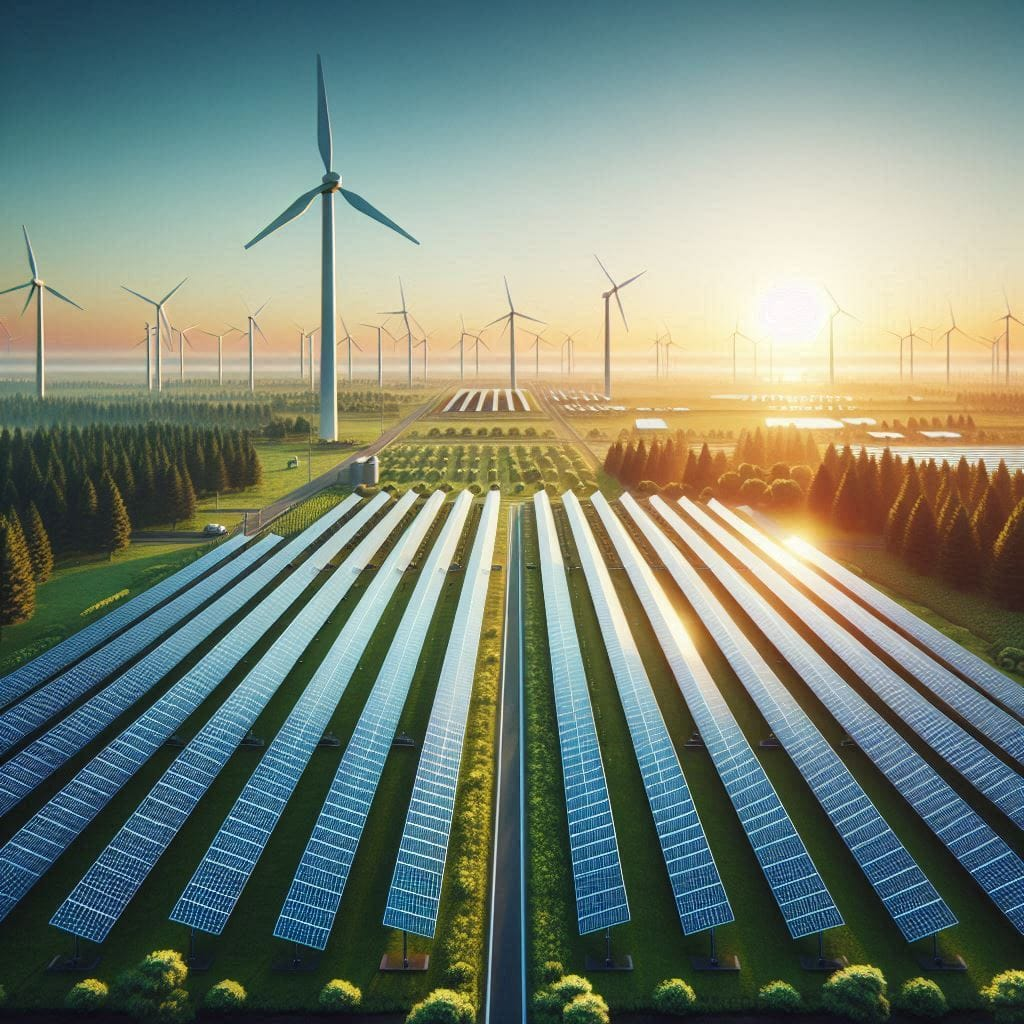
INTEGRANTES:
*   Andrés Argemiro Alvares Oñate
*   Olger Rafael Mercado Alvarez
*   Andrés Correa Cubides



In [54]:
# librerias necesaria para ejecutar el proyecto
import pandas as pd
import sqlite3
import csv
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.io as pio
pio.renderers.default = 'notebook'
import plotly.io as pio
pio.renderers.default = 'vscode'
import plotly.io as pio
pio.renderers.default = 'browser'


In [55]:
#crear base de datos
proyecto_final_db = sqlite3.connect('proyecto_final_db.db')

In [56]:
#llenar la base de datos con la informacion del csv

llenar = proyecto_final_db.cursor()

llenar.execute(''' CREATE TABLE IF NOT EXISTS energia_renovable_paises(
  Entity TEXT,
  Code TEXT,
  Year INTEGER,
  Electricity_from_wind_TWh ,
  Electricity_from_hydro_TWh REAL,
  Electricity_from_solar_TWh REAL,
  Electricity_from_other_renewables_TWh REAL
)
''')

In [57]:
# Llenar la base de datos con la información del CSV

with open('D:\\Documents\\udea\\udea semestre 4\\programas\\modern-renewable-prod.csv', 'r', encoding='utf-8') as archivo :
    lector = csv.reader(archivo, delimiter=',')
    next(lector)
    for fila in lector:
        llenar.execute('''
                        INSERT INTO energia_renovable_paises VALUES (?, ?, ?, ?, ?, ?, ?)
                      ''', fila)

proyecto_final_db.commit()

In [58]:
df = pd.read_sql_query('SELECT * FROM energia_renovable_paises', proyecto_final_db)
df.isnull().sum()

Entity                                   0
Code                                     0
Year                                     0
Electricity_from_wind_TWh                0
Electricity_from_hydro_TWh               0
Electricity_from_solar_TWh               0
Electricity_from_other_renewables_TWh    0
dtype: int64

In [59]:
# Eliminamos los datos de caracteres vacios y world. ya que world no es un pais
proyecto_final_db.execute("DELETE FROM energia_renovable_paises WHERE Code = '' OR Code IS NULL")
proyecto_final_db.execute('DELETE FROM energia_renovable_paises WHERE Entity LIKE \'%World%\'')
proyecto_final_db.commit()

# Ahora mostramos la tabla limpia
df_limpio = pd.read_sql_query('SELECT * FROM energia_renovable_paises', proyecto_final_db)
df_limpio.head(30)

,Entity,Code,Year,Electricity_from_wind_TWh,Electricity_from_hydro_TWh,Electricity_from_solar_TWh,Electricity_from_other_renewables_TWh
0,Afghanistan,AFG,2000,0,0.31,0.00,0.0
1,Afghanistan,AFG,2001,0,0.50,0.00,0.0
2,Afghanistan,AFG,2002,0,0.56,0.00,0.0
3,Afghanistan,AFG,2003,0,0.63,0.00,0.0
4,Afghanistan,AFG,2004,0,0.56,0.00,0.0
5,Afghanistan,AFG,2005,0,0.59,0.00,0.0
6,Afghanistan,AFG,2006,0,0.64,0.00,0.0
7,Afghanistan,AFG,2007,0,0.75,0.00,0.0
8,Afghanistan,AFG,2008,0,0.54,0.00,0.0
9,Afghanistan,AFG,2009,0,0.78,0.00,0.0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21957 entries, 0 to 21956
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Entity                                 21957 non-null  object 
 1   Code                                   21957 non-null  object 
 2   Year                                   21957 non-null  int64  
 3   Electricity_from_wind_TWh              21957 non-null  object 
 4   Electricity_from_hydro_TWh             21957 non-null  object 
 5   Electricity_from_solar_TWh             21957 non-null  float64
 6   Electricity_from_other_renewables_TWh  21957 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.2+ MB


In [61]:
#categorizar la columnas
df['Electricity_from_wind_TWh'] = pd.to_numeric(df['Electricity_from_wind_TWh'], errors='coerce')
df['Electricity_from_hydro_TWh'] = pd.to_numeric(df['Electricity_from_hydro_TWh'], errors='coerce')
df['Electricity_from_other_renewables_TWh'] = pd.to_numeric(df['Electricity_from_other_renewables_TWh'], errors='coerce')
df['Year'] = pd.to_datetime(df['Year'].astype(str) + '-01-01')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21957 entries, 0 to 21956
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Entity                                 21957 non-null  object        
 1   Code                                   21957 non-null  object        
 2   Year                                   21957 non-null  datetime64[ns]
 3   Electricity_from_wind_TWh              21956 non-null  float64       
 4   Electricity_from_hydro_TWh             21956 non-null  float64       
 5   Electricity_from_solar_TWh             21957 non-null  float64       
 6   Electricity_from_other_renewables_TWh  21943 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 1.2+ MB


In [62]:
df.describe()

,Year,Electricity_from_wind_TWh,Electricity_from_hydro_TWh,Electricity_from_solar_TWh,Electricity_from_other_renewables_TWh
count,21957,21956.000000,21956.000000,21957.000000,21943.000000
mean,2000-02-01 20:40:53.449924864,5.232393,48.888569,1.888863,4.729779
min,1965-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000
25%,1989-01-01 00:00:00,0.000000,0.036000,0.000000,0.000000
50%,2004-01-01 00:00:00,0.000000,1.940000,0.000000,0.000000
75%,2012-01-01 00:00:00,0.010000,12.660000,0.000000,0.421000
max,2021-01-01 00:00:00,1813.700000,4311.810000,1023.100000,749.990000
std,NaN,49.862785,224.065625,22.761796,28.742423


In [63]:
#Cantidad de registros por pais

df_pais= pd.read_sql_query('SELECT Entity, COUNT(*) AS CANTIDAD_REGISTROS FROM energia_renovable_paises GROUP BY Entity Order by COUNT(*) DESC', proyecto_final_db)
df_pais

,Entity,CANTIDAD_REGISTROS
0,Vietnam,171
1,United States,171
2,United Kingdom,171
3,Turkey,171
4,Thailand,171
...,...,...
205,American Samoa,63
206,Afghanistan,63
207,USSR,60
208,Montenegro,51


# GRAFICA DE CORRELACION

In [64]:
df_num = df_limpio.select_dtypes(include=['int64','float64'])
corr_pearson = df_num.corr(method='pearson')
corr_spearman = df_num.corr(method='spearman')

In [65]:
figCorrPearson= px.imshow(corr_pearson,aspect='auto', title='Matriz de Correlación Pearson')

figCorrPearson.show()

In [66]:
figCorrSpearman= px.imshow(corr_spearman, aspect='auto',title='Matriz de Correlación Spearman')
figCorrSpearman.show()

# GRAFICO MAPA EN EL TIEMPO

In [67]:
#grafica de produccion de ene
fig = px.choropleth(df_limpio.sort_values('Year'),
                    color='Electricity_from_hydro_TWh',
                    locations='Code',
                    locationmode='ISO-3',
                    animation_frame='Year')
fig.show()

# GRAFICO DE BARRAS

In [68]:
# TOP 10 DE LOS PAISES QUE MAS PRODUCEN ENERGIA CON HIDRO ELECTRICA

df_hydro = pd.read_sql_query('''select Entity,
SUM(Electricity_from_hydro_TWh ) AS TOTAL FROM energia_renovable_paises
group by Entity order by TOTAL desc LIMIT 10''', proyecto_final_db)
df_hydro

,Entity,TOTAL
0,China,59425.809
1,Canada,50630.520
2,United States,46845.291
3,Brazil,38920.335
4,Russia,18908.823
5,Norway,18108.471
6,Japan,13936.497
7,India,13199.076
8,Sweden,10790.973
9,France,10424.859


In [69]:
fig = px.bar(df_hydro, x ='Entity',y = 'TOTAL', title='TOP 10 DE LOS PAISES QUE MAS PRODUCEN ENERGIA CON HIDRO ELECTRICA')
xlabel = 'PAISES'
ylabel = 'TOTAL en TWh'
fig.update_layout(xaxis_title=xlabel, yaxis_title=ylabel)
fig.show()

# GRAFICO DE LINEAS

In [70]:
# Comparacion de los paises que mas producen energia con hidro electricas
df_comparacion = pd.read_sql_query('select Entity,Year,Electricity_from_hydro_TWh FROM energia_renovable_paises WHERE Entity IN ("United States","China")', proyecto_final_db)
df_comparacion

,Entity,Year,Electricity_from_hydro_TWh
0,China,1965,22.097
1,China,1966,22.486
2,China,1967,19.383
3,China,1968,22.870
4,China,1969,23.259
...,...,...,...
337,United States,2017,293.840
338,United States,2018,286.620
339,United States,2019,282.610
340,United States,2020,279.950


In [71]:
#grafico de china vs usa
fig = px.line(df_comparacion, x='Year', y='Electricity_from_hydro_TWh',color ='Entity', title='Comparación de Produccion de Energia')

# Mostrar el gráfico
fig.show()

# GRAFICO DE BARRAS AGRUPADO

In [72]:
#creamos un dataframe con los valores de china y estados unidos para ver sus datos en un grafico agrupado
df_agrupado = pd.read_sql_query('''SELECT Entity,
                                   SUM(Electricity_from_wind_TWh) AS Total_Wind,
                                   SUM(Electricity_from_hydro_TWh) AS Total_Hydro,
                                   SUM(Electricity_from_solar_TWh) AS Total_Solar,
                                  SUM(Electricity_from_other_renewables_TWh) AS Total_Other FROM energia_renovable_paises
                                  WHERE Entity IN ("United States", "China") GROUP BY Entity;''', proyecto_final_db)
df_agrupado.head()

,Entity,Total_Wind,Total_Hydro,Total_Solar,Total_Other
0,China,9498.468,59425.809,3768.972,2363.013
1,United States,8862.882,46845.291,2167.356,8615.451


In [73]:
# Convertir el DataFrame al formato largo
df_long = df_agrupado.melt(
    id_vars="Entity",
    var_name="Fuente",
    value_name="Electricidad (TWh)"
)
df_long.head(20)

,Entity,Fuente,Electricidad (TWh)
0,China,Total_Wind,9498.468
1,United States,Total_Wind,8862.882
2,China,Total_Hydro,59425.809
3,United States,Total_Hydro,46845.291
4,China,Total_Solar,3768.972
5,United States,Total_Solar,2167.356
6,China,Total_Other,2363.013
7,United States,Total_Other,8615.451


In [74]:
#gráfico de barras agrupadas
fig = px.bar(df_long,
             x='Entity',
             y='Electricidad (TWh)',
             color='Fuente',
             barmode='group',
             title='(Energias Renovables) China vs Usa')

fig.show()


# GRAFICO PASTEL

In [75]:
#creamos un tabla donde solo esten los tipos de produccion de energia renovable
df_pie = pd.read_sql_query('''select Electricity_from_wind_TWh,
                                    Electricity_from_hydro_TWh,
                                    Electricity_from_solar_TWh,
                                    Electricity_from_other_renewables_TWh FROM energia_renovable_paises''', proyecto_final_db)
df_pie.head()

,Electricity_from_wind_TWh,Electricity_from_hydro_TWh,Electricity_from_solar_TWh,Electricity_from_other_renewables_TWh
0,0,0.31,0.0,0.0
1,0,0.50,0.0,0.0
2,0,0.56,0.0,0.0
3,0,0.63,0.0,0.0
4,0,0.56,0.0,0.0


In [76]:
# Convertir las columnas en numerico y sumar
df_pie = df_pie.apply(pd.to_numeric, errors='coerce')
nuevo_df = df_pie.sum().reset_index()
nuevo_df.columns = ['Columna', 'Total']

print(nuevo_df)

                                 Columna       Total
0              Electricity_from_wind_TWh   38793.303
1             Electricity_from_hydro_TWh  401274.288
2             Electricity_from_solar_TWh   14101.716
3  Electricity_from_other_renewables_TWh   35992.095


In [77]:
# grafico de pastel
fig_pie = px.pie(nuevo_df, values='Total', names='Columna', title='Distribución de la energía renovable')
fig_pie.show()

# GRAFICOS COLOMBIA

In [78]:
# rankin de produccion de enegia con hidro electrica en sur america
df_colombia = pd.read_sql_query('''SELECT
                                        Entity,
                                        Year,
                                        Electricity_from_hydro_TWh,
                                        RANK() OVER (PARTITION BY
                                                      Year
                                                    ORDER BY
                                                      Electricity_from_hydro_TWh DESC
                                                    ) paises_rank
                                 FROM
                                    energia_renovable_paises
                                     WHERE
                                  Year = 2020
                                  AND Entity IN ('Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia',
                       'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'); ''',proyecto_final_db)
df_colombia.head(20)

,Entity,Year,Electricity_from_hydro_TWh,paises_rank
0,Brazil,2020,409.50,1
1,Brazil,2020,409.50,1
2,Brazil,2020,409.50,1
3,Venezuela,2020,72.00,4
4,Venezuela,2020,72.00,4
5,Venezuela,2020,72.00,4
6,Paraguay,2020,49.34,7
7,Paraguay,2020,49.34,7
8,Paraguay,2020,49.34,7
9,Colombia,2020,45.82,10


In [79]:
# Elegir el país al que se le cambiará el color
pais_destacado = 'Colombia'

# Crear una columna para definir colores
df_colombia['Color'] = df_colombia['Entity'].apply(lambda x: 'red' if x == pais_destacado else 'blue')
df_colombia.head(20)

,Entity,Year,Electricity_from_hydro_TWh,paises_rank,Color
0,Brazil,2020,409.50,1,blue
1,Brazil,2020,409.50,1,blue
2,Brazil,2020,409.50,1,blue
3,Venezuela,2020,72.00,4,blue
4,Venezuela,2020,72.00,4,blue
5,Venezuela,2020,72.00,4,blue
6,Paraguay,2020,49.34,7,blue
7,Paraguay,2020,49.34,7,blue
8,Paraguay,2020,49.34,7,blue
9,Colombia,2020,45.82,10,red


# GRAFICO DE BARRAS SUR AMERICA

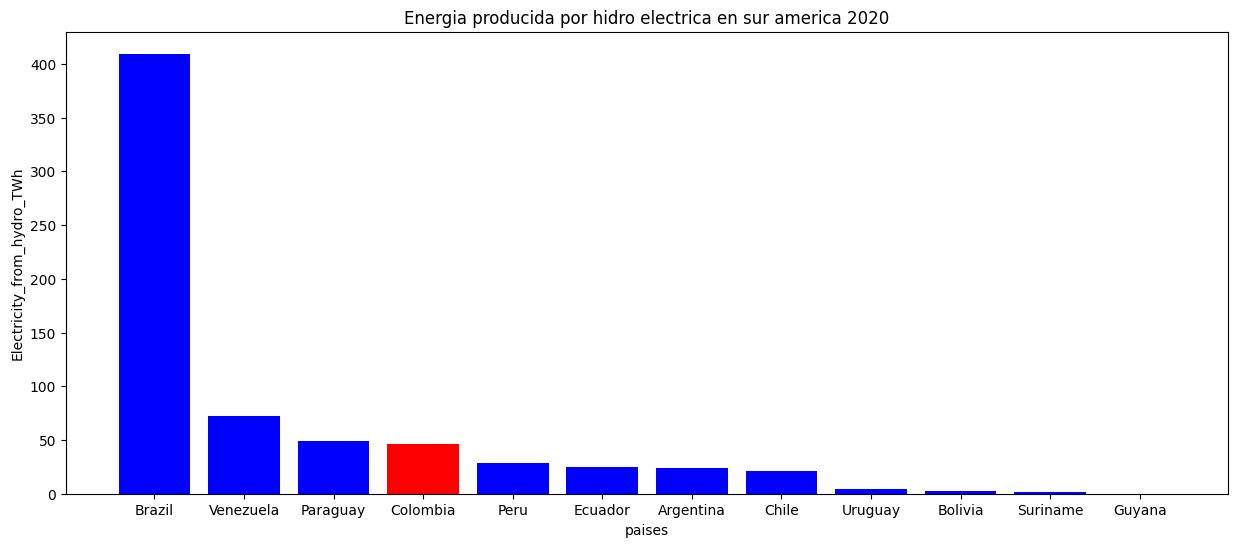

In [80]:
#graficas de barras de produccion de energia en el año 2020

plt.figure(figsize=(15, 6))

plt.bar(df_colombia['Entity'], df_colombia['Electricity_from_hydro_TWh'], color=df_colombia['Color'])

plt.title('Energia producida por hidro electrica en sur america 2020')
plt.ylabel('Electricity_from_hydro_TWh')
plt.xlabel('paises')

plt.show()

# MAPA SUR AMERICA

In [81]:
# produccion de energia renovable a nivel sur america
df_sur = pd.read_sql_query('''SELECT  * FROM energia_renovable_paises
                                     WHERE
                                 Entity IN ('Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia',
                       'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'); ''',proyecto_final_db)
df_sur.head(5)

,Entity,Code,Year,Electricity_from_wind_TWh,Electricity_from_hydro_TWh,Electricity_from_solar_TWh,Electricity_from_other_renewables_TWh
0,Argentina,ARG,1965,0,1.225,0.0,0.0
1,Argentina,ARG,1966,0,1.241,0.0,0.0
2,Argentina,ARG,1967,0,1.271,0.0,0.0
3,Argentina,ARG,1968,0,1.498,0.0,0.0
4,Argentina,ARG,1969,0,1.344,0.0,0.0


In [82]:
#grafica mapa de producion de energia en el tiempo
fig = px.choropleth(df_sur.sort_values('Year'),
                    color='Electricity_from_hydro_TWh',
                    locations='Code',
                    locationmode='ISO-3',
                    animation_frame='Year')
fig.show()

In [83]:
#tabla donde salen
df_comparacion2 = pd.read_sql_query('select Entity,Year,Electricity_from_hydro_TWh FROM energia_renovable_paises WHERE Entity IN ("Brazil","Colombia","Paraguay","Venezuela")', proyecto_final_db)
df_comparacion2

,Entity,Year,Electricity_from_hydro_TWh
0,Brazil,1965,25.515
1,Brazil,1966,27.906
2,Brazil,1967,29.189
3,Brazil,1968,30.550
4,Brazil,1969,32.692
...,...,...,...
565,Venezuela,2016,62.330
566,Venezuela,2017,59.900
567,Venezuela,2018,57.570
568,Venezuela,2019,72.000


In [84]:
#grafico comparativo sur america
fig = px.line(df_comparacion2, x='Year', y='Electricity_from_hydro_TWh',color ='Entity', title='Comparación de Produccion de Energia')

# Mostrar el gráfico
fig.show()

In [85]:
df_agrupado2 = pd.read_sql_query('''SELECT Entity,
                                   SUM(Electricity_from_wind_TWh) AS Total_Wind,
                                   SUM(Electricity_from_hydro_TWh) AS Total_Hydro,
                                   SUM(Electricity_from_solar_TWh) AS Total_Solar,
                                  SUM(Electricity_from_other_renewables_TWh) AS Total_Other FROM energia_renovable_paises
                                  WHERE Entity IN ("Brazil","Colombia","Paraguay","Venezuela") GROUP BY Entity;''', proyecto_final_db)
df_agrupado2.head()

,Entity,Total_Wind,Total_Hydro,Total_Solar,Total_Other
0,Brazil,1089.729,38920.335,103.08,2284.524
1,Colombia,2.580,4618.284,1.59,59.712
2,Paraguay,0.000,3400.830,0.00,0.000
3,Venezuela,2.310,7029.174,0.18,0.000


In [86]:
# Convertir el DataFrame al formato largo
df_long2 = df_agrupado2.melt(
    id_vars="Entity",
    var_name="Fuente",
    value_name="Electricidad (TWh)"
)
df_long2.head(100)

,Entity,Fuente,Electricidad (TWh)
0,Brazil,Total_Wind,1089.729
1,Colombia,Total_Wind,2.580
2,Paraguay,Total_Wind,0.000
3,Venezuela,Total_Wind,2.310
4,Brazil,Total_Hydro,38920.335
5,Colombia,Total_Hydro,4618.284
6,Paraguay,Total_Hydro,3400.830
7,Venezuela,Total_Hydro,7029.174
8,Brazil,Total_Solar,103.080
9,Colombia,Total_Solar,1.590


In [87]:
#gráfico de barras agrupadas
fig = px.bar(df_long2,
             x='Entity',
             y='Electricidad (TWh)',
             color='Fuente',
             barmode='group',
             title='(Energias Renovables) sur america')

fig.show()
